In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer




In [46]:
data = pd.read_csv('./banana.csv')

data.dropna(inplace=True)


In [47]:
data.dtypes

At1      float64
At2      float64
Class      int64
dtype: object

In [48]:
data.isnull().sum()*100/len(data)

At1      0.0
At2      0.0
Class    0.0
dtype: float64

<Axes: >

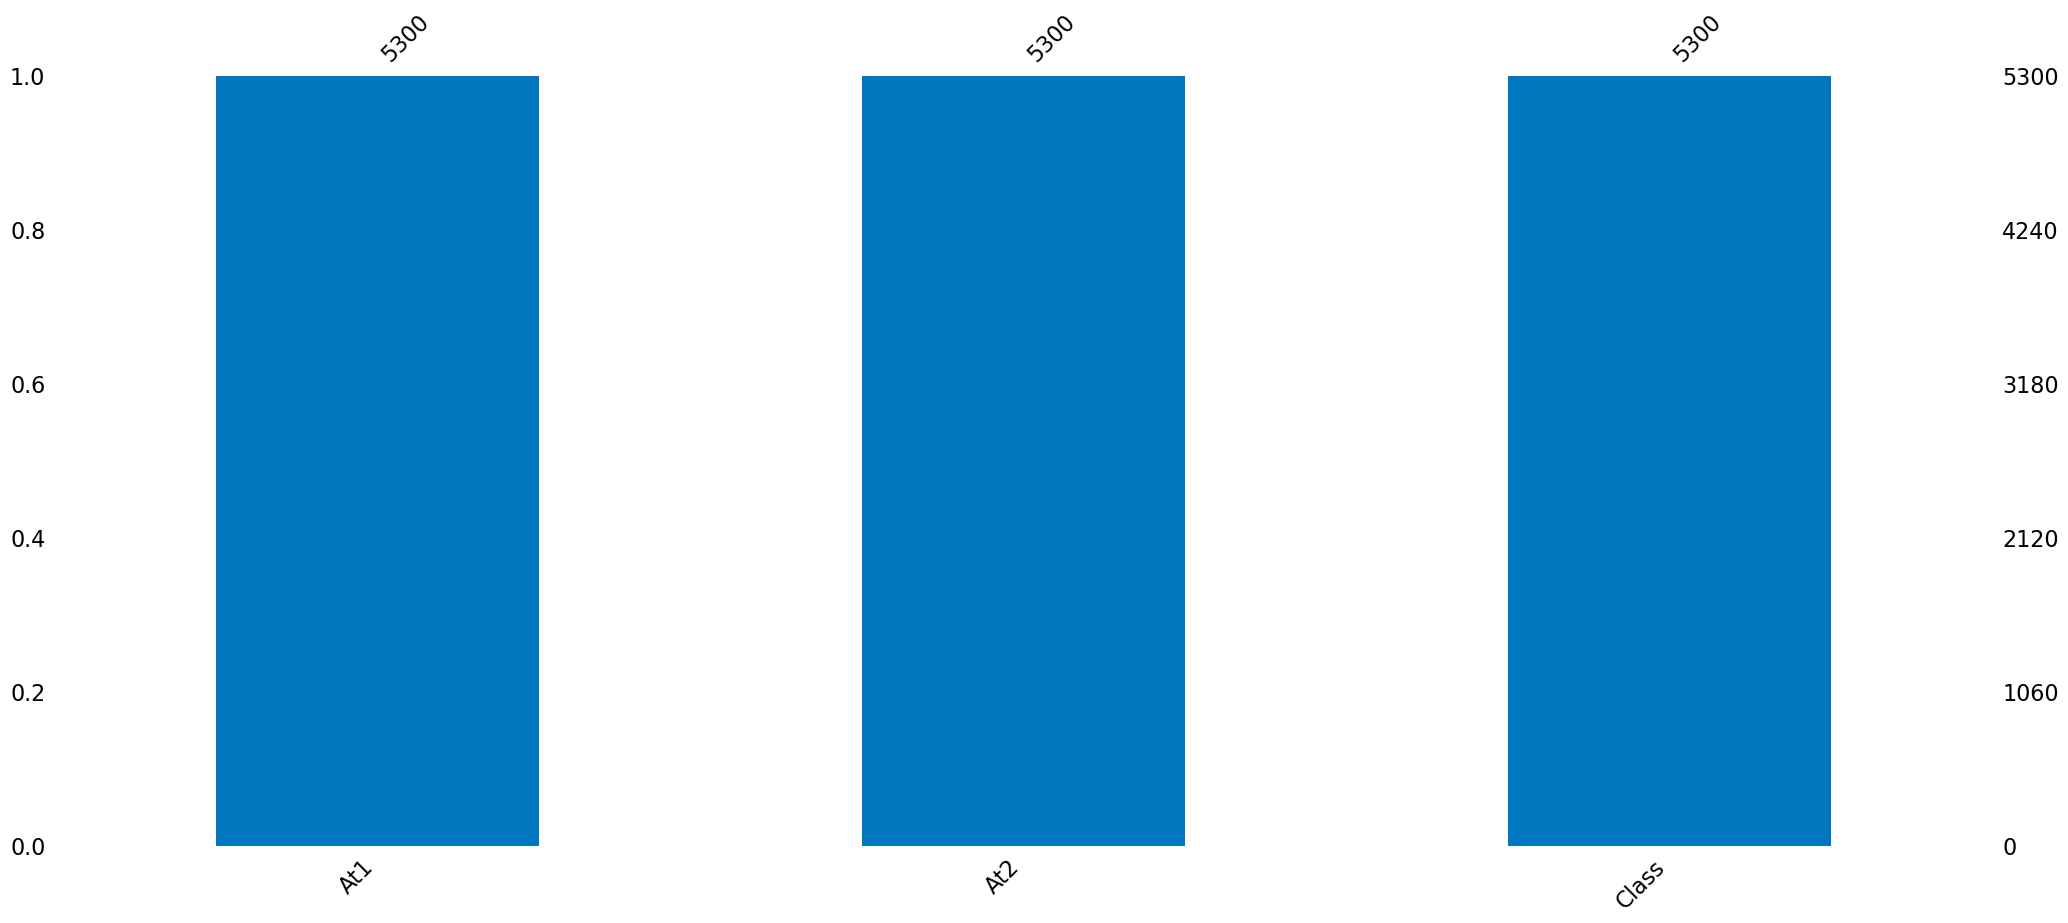

In [49]:
msno.bar(data, color="#0077be")

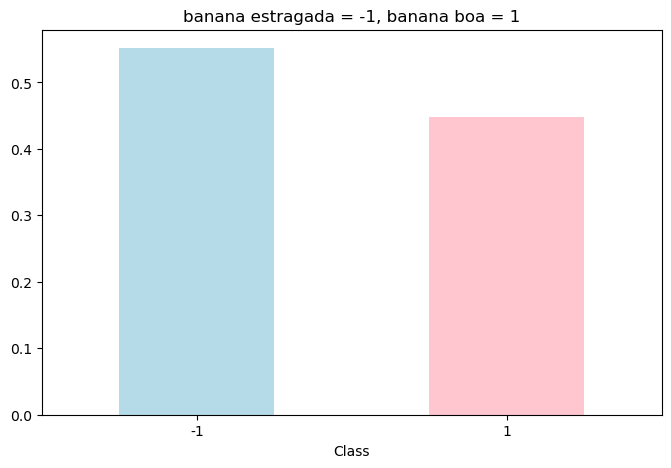

In [50]:
fig = plt.figure(figsize = (8,5))
data.Class.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('banana estragada = -1, banana boa = 1')
plt.show()

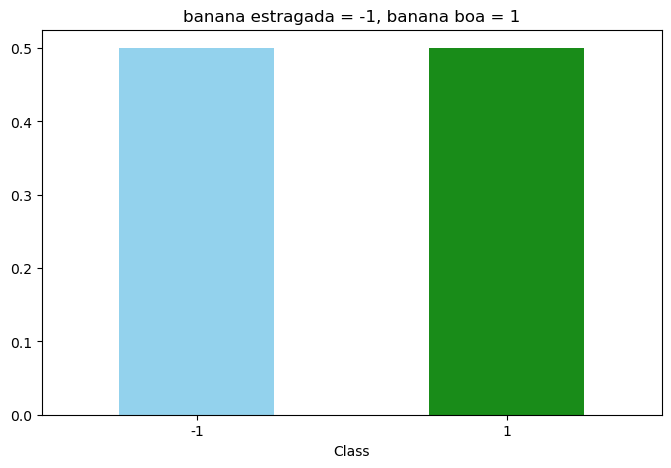

In [51]:
no = data[data.Class == -1]
yes = data[data.Class == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.Class.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
plt.title('banana estragada = -1, banana boa = 1')
plt.show()

#no = data[data.Class == -1]
#yes = data[data.Class == 1]
#no_undersampled = resample(no, replace=True, n_samples=len(yes), random_state=123)
#undersampled = pd.concat([yes, no_undersampled])

#fig = plt.figure(figsize = (8,5))
#undersampled.Class.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
#plt.title('heart attack Yes=1, not heart attack No = 0')
#plt.show()

In [52]:
x = data[['At1','At2']]
y = data['Class']

X = oversampled.drop(["Class"], axis=1)
Y = oversampled["Class"]

In [53]:
print(X)
len(X)


        At1    At2
0     1.140 -0.114
2    -1.050  0.720
6     1.830  0.452
10    1.790 -0.459
11   -0.122 -0.808
...     ...    ...
5150  0.578 -0.622
3524 -1.070 -0.306
1286 -1.460 -0.891
1953  1.040 -0.240
3227 -0.987 -0.814

[5848 rows x 2 columns]


5848

In [54]:
print(y)
len(y)

0      -1
1       1
2      -1
3       1
4       1
       ..
5295    1
5296    1
5297    1
5298   -1
5299    1
Name: Class, Length: 5300, dtype: int64


5300

In [55]:
print(Y)
len(Y)

0      -1
2      -1
6      -1
10     -1
11     -1
       ..
5150    1
3524    1
1286    1
1953    1
3227    1
Name: Class, Length: 5848, dtype: int64


5848

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 0)

In [57]:
x_train_new, x_test_new, y_train_new , y_test_new = train_test_split(x,y, test_size=0.2, stratify=y, random_state= 0)

In [78]:
print(len(X_train))
print(len(X_train)/len(X))
print(len(y_test_new))

4678
0.7999316005471956
1060


In [59]:
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

x_train_standard_new = scaler.fit_transform(x_train_new)
x_test_standard_new = scaler.transform(x_test_new)

In [60]:
print(x_train_standard)
print(x_test_standard)
len(x_train_standard)

[[ 1.08424828  0.94102704]
 [ 0.76774591 -0.79728324]
 [-1.77028258 -0.91692403]
 ...
 [ 0.5724359   1.63976946]
 [ 0.47327852  1.2275617 ]
 [ 1.07423238  0.45442081]]
[[-0.71460696 -1.18536177]
 [ 2.09585395  1.11696938]
 [-1.12926512  0.20508538]
 ...
 [-1.78029848 -0.57408782]
 [-0.01900286  0.718837  ]
 [-0.89489312  0.21916077]]


4678

In [61]:
x_train_standard.mean(axis=0)

array([3.53144904e-17, 1.97457366e-17])

In [62]:
x_test_standard.mean(axis=0)

array([-0.02266831, -0.01503083])

In [63]:
model_1 = LogisticRegression()
model_1.fit(x_train_standard, y_train)
y_pred_1 = model_1.predict(x_test_standard_new)
#y_pred_1 = model_1.predict(x_test_new)
#y_pred_1t = model_1.predict(x_train_standard_new)

model_2 = (LinearSVC(C=1))
model_2.fit(x_train_standard, y_train)
y_pred_2 = model_2.predict(x_test_standard_new)
#y_pred_2 = model_2.predict(x_test_new)
#y_pred_2t = model_2.predict(x_train_standard_new)

model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=8, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 9000))),).fit(x_train_standard, y_train)
y_pred_3 = model_3.predict(x_test_standard_new)
#y_pred_3 = model_3.predict(x_test_new)
#y_pred_3t = model_3.predict(x_train_standard_new)

model_4 = Pipeline((("poly_features", PolynomialFeatures(degree=7, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=10000000)))),).fit(x_train_standard, y_train)
y_pred_4 = model_4.predict(x_test_standard_new)
#y_pred_4 = model_4.predict(x_test_new)
#y_pred_4t = model_4.predict(x_train_standard_new)

c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [64]:
print(y_pred_1)
print(y_pred_2)
print(y_pred_3)
print(y_pred_4)

[ 1  1  1 ... -1  1  1]
[ 1  1  1 ... -1  1  1]
[-1  1  1 ... -1 -1  1]
[-1  1  1 ... -1 -1  1]


In [65]:
x_test_standard_new

array([[ 0.43993628, -1.13304678],
       [ 0.97230858, -1.47442214],
       [-1.56869541, -0.20430499],
       ...,
       [ 1.39780689,  0.54471272],
       [-0.14837007, -1.37401762],
       [-0.5838566 ,  0.09560331]])

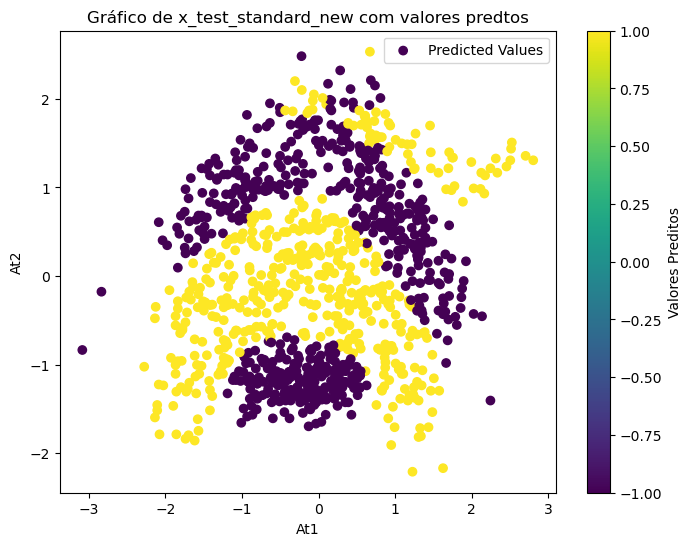

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test_standard_new[:,0], x_test_standard_new[:,1], c=y_pred_3, cmap='viridis', marker='o', label='Predicted Values')
#plt.scatter(x_train_standard_new[:,0], x_train_standard_new[:,1], c=y_pred, cmap='viridis', marker='o', label='Predicted Values')


plt.xlabel('At1')
plt.ylabel('At2')
plt.colorbar(label='Valores Preditos')


plt.title('Gráfico de x_test_standard_new com valores predtos')
plt.legend()
plt.show()

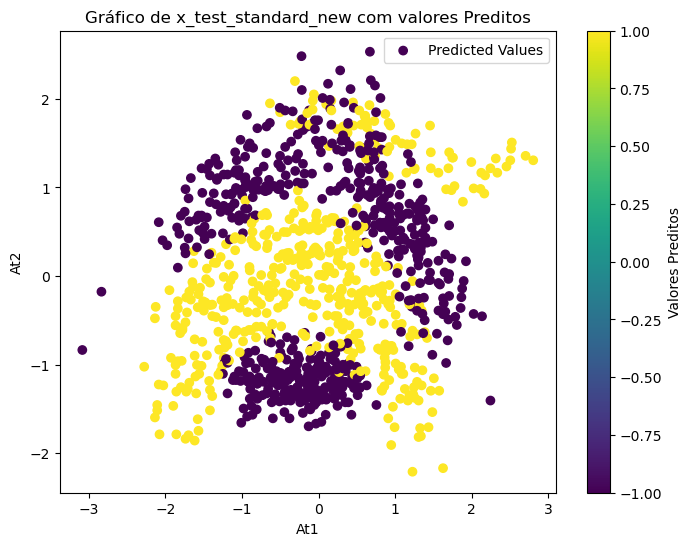

In [67]:

plt.figure(figsize=(8, 6))
plt.scatter(x_test_standard_new[:,0], x_test_standard_new[:,1], c=y_test_new, cmap='viridis', marker='o', label='Predicted Values')
#plt.scatter(x_train_standard_new[:,0], x_train_standard_new[:,1], c=y_pred, cmap='viridis', marker='o', label='Predicted Values')


plt.xlabel('At1')
plt.ylabel('At2')
plt.colorbar(label='Valores Preditos')


plt.title('Gráfico de x_test_standard_new com valores Preditos')
plt.legend()
plt.show()

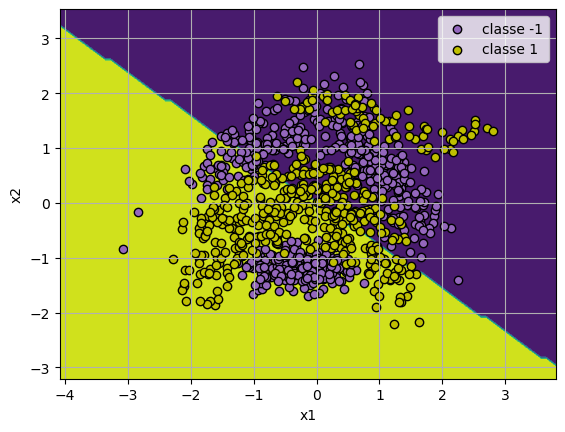

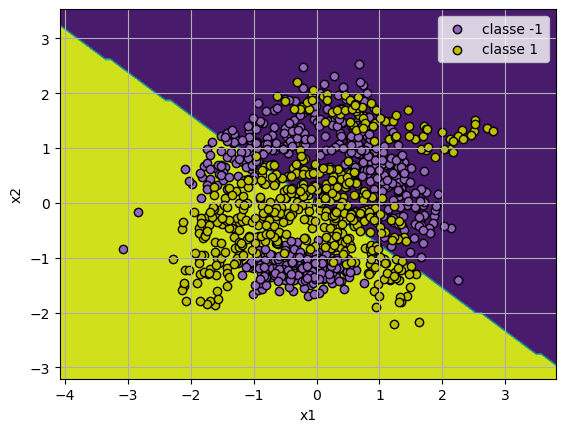

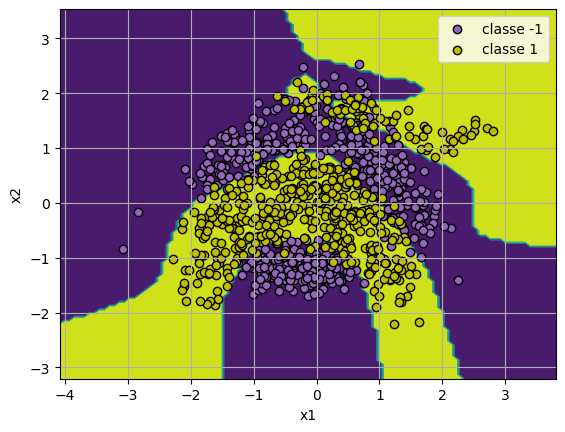

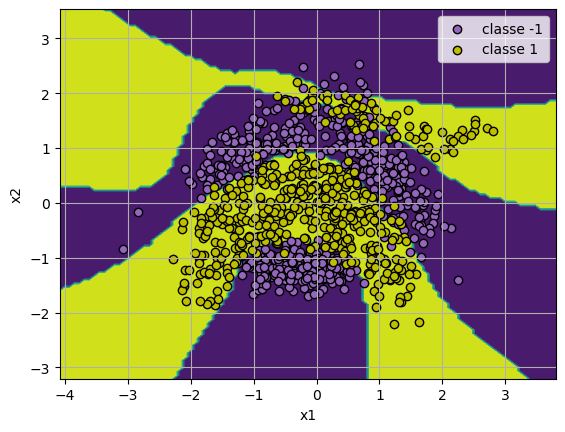

In [68]:
disp_1 = DecisionBoundaryDisplay.from_estimator(model_1,x_test_standard_new,response_method="predict",alpha=1)
disp_1.ax_.scatter(x_test_standard_new[y_test_new==-1,0],x_test_standard_new[y_test_new==-1,1],c='tab:purple',label="classe -1",edgecolor="k")
disp_1.ax_.scatter(x_test_standard_new[y_test_new==1,0],x_test_standard_new[y_test_new==1,1],c='y',label="classe 1",edgecolor="k")
disp_1.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_1.ax_.grid()

disp_2 = DecisionBoundaryDisplay.from_estimator(model_2,x_test_standard_new,response_method="predict",alpha=1)
disp_2.ax_.scatter(x_test_standard_new[y_test_new==-1,0],x_test_standard_new[y_test_new==-1,1],c='tab:purple',label="classe -1",edgecolor="k")
disp_2.ax_.scatter(x_test_standard_new[y_test_new==1,0],x_test_standard_new[y_test_new==1,1],c='y',label="classe 1",edgecolor="k")
disp_2.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_2.ax_.grid()

disp_3 = DecisionBoundaryDisplay.from_estimator(model_3,x_test_standard_new,response_method="predict",alpha=1)
disp_3.ax_.scatter(x_test_standard_new[y_test_new==-1,0],x_test_standard_new[y_test_new==-1,1],c='tab:purple',label="classe -1",edgecolor="k")
disp_3.ax_.scatter(x_test_standard_new[y_test_new==1,0],x_test_standard_new[y_test_new==1,1],c='y',label="classe 1",edgecolor="k")
disp_3.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_3.ax_.grid()

disp_4 = DecisionBoundaryDisplay.from_estimator(model_4,x_test_standard_new,response_method="predict",alpha=1)
disp_4.ax_.scatter(x_test_standard_new[y_test_new==-1,0],x_test_standard_new[y_test_new==-1,1],c='tab:purple',label="classe -1",edgecolor="k")
disp_4.ax_.scatter(x_test_standard_new[y_test_new==1,0],x_test_standard_new[y_test_new==1,1],c='y',label="classe 1",edgecolor="k")
disp_4.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_4.ax_.grid()



Confusion Matrix:
[[312 273]
 [211 264]]
Accuracy: 54.34%


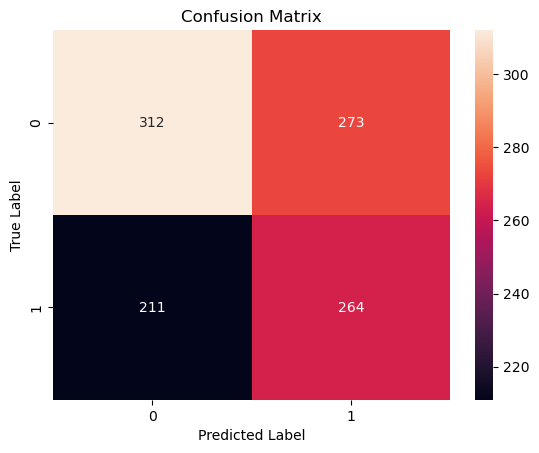

In [69]:
cm = confusion_matrix(y_test_new, y_pred_1)
acc_reg_test = accuracy_score(y_test_new, y_pred_1)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[312 273]
 [211 264]]
Accuracy: 54.34%


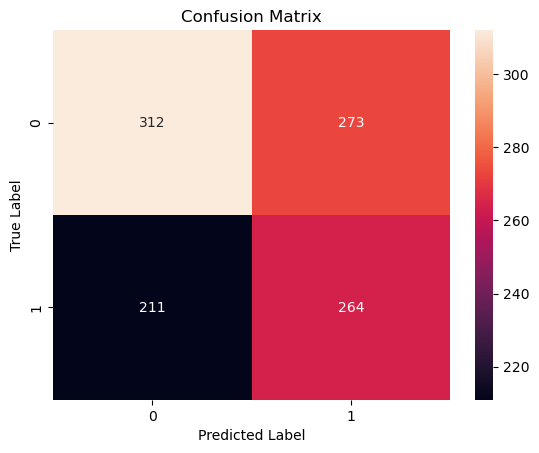

In [70]:
cm = confusion_matrix(y_test_new, y_pred_2)
acc_reg_test = accuracy_score(y_test_new, y_pred_2)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[538  47]
 [ 45 430]]
Accuracy: 91.32%


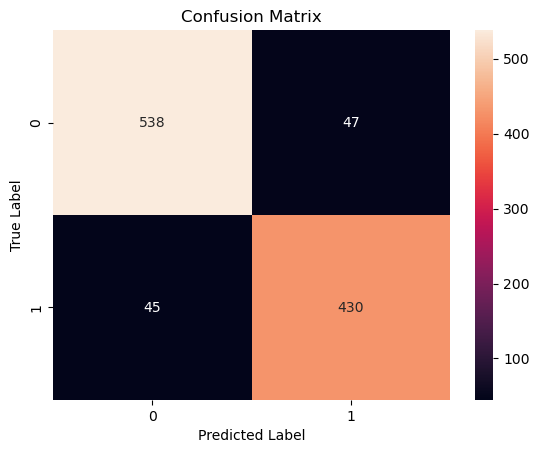

In [71]:
cm = confusion_matrix(y_test_new, y_pred_3)
acc_reg_test = accuracy_score(y_test_new, y_pred_3)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[536  49]
 [ 42 433]]
Accuracy: 91.42%


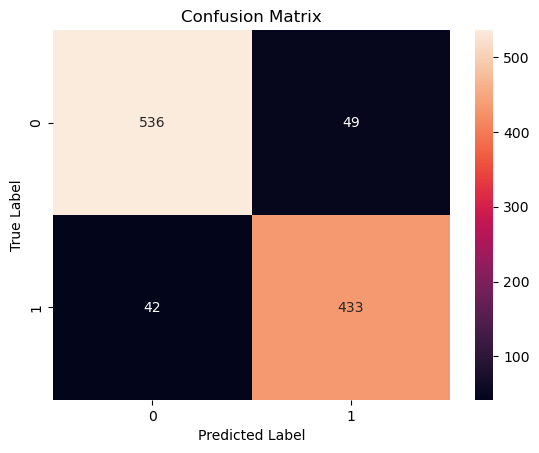

In [72]:
cm = confusion_matrix(y_test_new, y_pred_4)
acc_reg_test = accuracy_score(y_test_new, y_pred_4)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

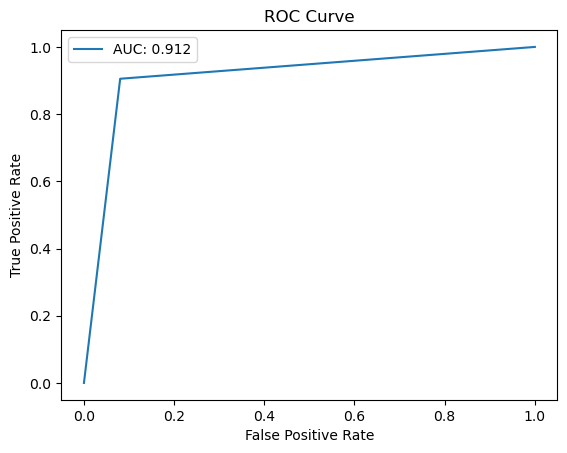

In [73]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_3)
auc = roc_auc_score(y_test_new, y_pred_3)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [74]:
accuracy = accuracy_score(y_test_new, y_pred_1)
#accuracy_0 = accuracy_score(y_train_new, y_pred_1t)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_1)
#report_0 = classification_report(y_train_new, y_pred_1t)
print(report)

Accuracy: 0.5433962264150943
              precision    recall  f1-score   support

          -1       0.60      0.53      0.56       585
           1       0.49      0.56      0.52       475

    accuracy                           0.54      1060
   macro avg       0.54      0.54      0.54      1060
weighted avg       0.55      0.54      0.54      1060



In [75]:
accuracy = accuracy_score(y_test_new, y_pred_2)
#accuracy_0 = accuracy_score(y_train_new, y_pred_2t)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_2)
#report_0 = classification_report(y_train_new, y_pred_2t)
print(report)

Accuracy: 0.5433962264150943
              precision    recall  f1-score   support

          -1       0.60      0.53      0.56       585
           1       0.49      0.56      0.52       475

    accuracy                           0.54      1060
   macro avg       0.54      0.54      0.54      1060
weighted avg       0.55      0.54      0.54      1060



In [76]:
accuracy = accuracy_score(y_test_new, y_pred_3)
#accuracy_0 = accuracy_score(y_train_new, y_pred_3t)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_3)
#report_0 = classification_report(y_train_new, y_pred_3t)
print(report)

Accuracy: 0.9132075471698113
              precision    recall  f1-score   support

          -1       0.92      0.92      0.92       585
           1       0.90      0.91      0.90       475

    accuracy                           0.91      1060
   macro avg       0.91      0.91      0.91      1060
weighted avg       0.91      0.91      0.91      1060



In [77]:
accuracy = accuracy_score(y_test_new, y_pred_4)
#accuracy_0 = accuracy_score(y_train_new, y_pred_4t)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_4)
#report_0 = classification_report(y_train_new, y_pred_4t)
print(report)

Accuracy: 0.9141509433962264
              precision    recall  f1-score   support

          -1       0.93      0.92      0.92       585
           1       0.90      0.91      0.90       475

    accuracy                           0.91      1060
   macro avg       0.91      0.91      0.91      1060
weighted avg       0.91      0.91      0.91      1060

